# Project 2: Singapore Housing Data & Kaggle Challenge
<b>
    <b>

# Table of Contents:
1. [Problem Statement](#Problem-Statement)
2. [Data Import & Cleaning](#Data-Import-and-Cleaning)
3. [Exploratory Data Analysis](#Basic-Exploratory-Data-Analysis)
4. [Preprocessing, Modeling & Evaluation](#Preprocessing-and-Modelling)
    - [Baseline Model](#Creating-a-baseline-model)
    - [Feature Engineering](#Feature-Engineering)
    - [Training a new model](#Training-a-new-model)
    - [Regularization for a better model](#Regularization-for-a-better-model)
5. [Model Conclusion](#Model-Conclusion)
6. [Prediction using Chosen Model](#Prediction-using-Chosen-Model)

# Problem Statement:

We will be using Singapore public housing data to create a regression model that predicts the price of Housing Development Board (HDB) flats in Singapore. This model will predict the price of a house at sale. We will be evaluating the models using their RMSE values. 

### Data Dictionary

This Dataset is an exceptionally detailed one with over 70 columns of different features relating to houses. Below are their features and corresponding description;

|Feature|Description|
|---|---|
|resale_price|the property's sale price in Singapore dollars - ***Prediction target variable***|
|Tranc_YearMonth| year and month of the resale transaction, e.g. 2015-02|
|town| HDB township where the flat is located, e.g. BUKIT MERAH|
|flat_type| type of the resale flat unit, e.g. 3 ROOM|
|block| block number of the resale flat, e.g. 454|
|street_name| street name where the resale flat resides, e.g. TAMPINES ST 42|
|storey_range| floor level (range) of the resale flat unit, e.g. 07 TO 09|
floor_area_sqm| floor area of the resale flat unit in square metres|
flat_model| HDB model of the resale flat, e.g. Multi Generation|
|lease_commence_date| commencement year of the flat unit's 99-year lease|
|Tranc_Year| year of resale transaction|
|Tranc_Month| month of resale transaction|
|mid_storey| median value of storey_range|
|lower| lower value of storey_range|
|upper| upper value of storey_range|
|mid| middle value of storey_range|
|full_flat_type| combination of flat_type and flat_model|
|address| combination of block and street_name|
|floor_area_sqft| floor area of the resale flat unit in square feet|
precinct_pavilion|hdb_age| number of years from lease_commence_date to present year|
|max_floor_lvl| highest floor of the resale flat|
|year_completed| year which construction was completed for resale flat|
|residential| boolean value if resale flat has residential units in the same block|
|commercial| boolean value if resale flat has commercial units in the same block|
|market_hawker| boolean value if resale flat has a market or hawker centre in the same block|
|multistorey_carpark| boolean value if resale flat has a multistorey carpark in the same block|
|precinct_pavilion| boolean value if resale flat has a pavilion in the same block|
|total_dwelling_units| total number of residential dwelling units in the resale flat|
|1room_sold| number of 1-room residential units in the resale flat|
|2room_sold| number of 2-room residential units in the resale flat|
|3room_sold| number of 3-room residential units in the resale flat|
|4room_sold| number of 4-room residential units in the resale flat|
|5room_sold| number of 5-room residential units in the resale flat|
|exec_sold| number of executive type residential units in the resale flat block|
|multigen_sold| number of multi-generational type residential units in the resale flat block|
|studio_apartment_sold| number of studio apartment type residential units in the resale flat block|
|1room_rental| number of 1-room rental residential units in the resale flat block|
|2room_rental| number of 2-room rental residential units in the resale flat block|
|3room_rental| number of 3-room rental residential units in the resale flat block|
|other_room_rental| number of "other" type rental residential units in the resale flat block|
|postal| postal code of the resale flat block|0|
|Latitude| Latitude based on postal code|
|Longitude| Longitude based on postal code|
|planning_area| Government planning area that the flat is located|
|Mall_Nearest_Distance| distance (in metres) to the nearest mall|
|Mall_Within_500m| boolean value if there is a mall within 500 metres|
|Mall_Within_1km| boolean value if there is a mall within 1 kilometre|
|Mall_Within_2km| boolean value if there is a mall within 2 kilometres|
|Hawker_Nearest_Distance| distance (in metres) to the nearest hawker centre|
|Hawker_Within_500m| boolean value if there is a hawker centre within 500 metres|
|Hawker_Within_1km| boolean value if there is a hawker centre within 1 kilometre|
|Hawker_Within_2km| boolean value if there is a hawker centre within 2 kilometres|
|hawker_food_stalls| number of hawker food stalls in the nearest hawker centre|
|hawker_market_stalls| number of hawker and market stalls in the nearest hawker centre|
|mrt_nearest_distance| distance (in metres) to the nearest MRT station|
|mrt_name| name of the nearest MRT station|
|bus_interchange| boolean value if the nearest MRT station is also a bus interchange|
|mrt_interchange| boolean value if the nearest MRT station is a train interchange station|
|mrt_latitude| latitude (in decimal degrees) of the the nearest MRT station|
|mrt_longitude| longitude (in decimal degrees) of the nearest MRT station|
|bus_stop_nearest_distance| distance (in metres) to the nearest bus stop|
|bus_stop_name| name of the nearest bus stop|
|bus_stop_latitude| latitude (in decimal degrees) of the the nearest bus stop|
|bus_stop_longitude| longitude (in decimal degrees) of the nearest bus stop|
|pri_sch_nearest_distance| distance (in metres) to the nearest primary school|
|pri_sch_name| name of the nearest primary school|
|vacancy| number of vacancies in the nearest primary school|
|pri_sch_affiliation| boolean value if the nearest primary school has a secondary school affiliation|
|pri_sch_latitude| latitude (in decimal degrees) of the the nearest primary school|
|pri_sch_longitude| longitude (in decimal degrees) of the nearest primary school|
|sec_sch_nearest_dist| distance (in metres) to the nearest secondary school|
|sec_sch_name| name of the nearest secondary school|
|cutoff_point| PSLE cutoff point of the nearest secondary school|
|affiliation| boolean value if the nearest secondary school has an primary school affiliation|
|sec_sch_latitude| latitude (in decimal degrees) of the the nearest secondary school|
|sec_sch_longitude| longitude (in decimal degrees) of the nearest secondary school|

# Data Import and Cleaning 

We will first import libraries and load the dataset.

In [435]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [436]:
### Loading the train and test datasets

original_train_dataset = pd.read_csv('datasets/train.csv')

original_test_dataset = pd.read_csv('datasets/test.csv')
                          

C:\Users\benyo\AppData\Local\Temp\ipykernel_8436\1981312616.py:3: DtypeWarning:

Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\benyo\AppData\Local\Temp\ipykernel_8436\1981312616.py:5: DtypeWarning:

Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.



In [437]:
print(original_train_dataset.shape)
original_train_dataset.head()

(150634, 77)


id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 77 columns]

In [438]:
### Checking on datasets due to warning from previous code loading datasets. 

original_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [439]:
print(original_test_dataset.shape)
original_test_dataset.info()

(16737, 76)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 n

<br> Looking for null values.

In [440]:
dict(original_train_dataset.isnull().sum())

{'id': 0,
 'Tranc_YearMonth': 0,
 'town': 0,
 'flat_type': 0,
 'block': 0,
 'street_name': 0,
 'storey_range': 0,
 'floor_area_sqm': 0,
 'flat_model': 0,
 'lease_commence_date': 0,
 'resale_price': 0,
 'Tranc_Year': 0,
 'Tranc_Month': 0,
 'mid_storey': 0,
 'lower': 0,
 'upper': 0,
 'mid': 0,
 'full_flat_type': 0,
 'address': 0,
 'floor_area_sqft': 0,
 'hdb_age': 0,
 'max_floor_lvl': 0,
 'year_completed': 0,
 'residential': 0,
 'commercial': 0,
 'market_hawker': 0,
 'multistorey_carpark': 0,
 'precinct_pavilion': 0,
 'total_dwelling_units': 0,
 '1room_sold': 0,
 '2room_sold': 0,
 '3room_sold': 0,
 '4room_sold': 0,
 '5room_sold': 0,
 'exec_sold': 0,
 'multigen_sold': 0,
 'studio_apartment_sold': 0,
 '1room_rental': 0,
 '2room_rental': 0,
 '3room_rental': 0,
 'other_room_rental': 0,
 'postal': 0,
 'Latitude': 0,
 'Longitude': 0,
 'planning_area': 0,
 'Mall_Nearest_Distance': 829,
 'Mall_Within_500m': 92789,
 'Mall_Within_1km': 25426,
 'Mall_Within_2km': 1940,
 'Hawker_Nearest_Distance': 0

There are null values in the respective columns;

|Columns with null values: Number of null values|
|------|
|'Mall_Nearest_Distance': 829
|'Mall_Within_500m': 92789
|'Mall_Within_1km': 25426
|'Mall_Within_2km': 1940
|'Hawker_Within_500m': 97390
|'Hawker_Within_1km': 60868
|'Hawker_Within_2km': 29202

In [441]:
max_mall_proximity = original_train_dataset['Mall_Nearest_Distance'].max()
print(f'Max distance calculatation for mall proximity is: {max_mall_proximity}m')

Max distance calculatation for mall proximity is: 3496.40291m


<br>Exploring 'Mall_Nearest_Distance' column.

In [442]:
### Subsetting dataset to explore patterns

mall_is_max = original_train_dataset.loc[original_train_dataset['Mall_Nearest_Distance'] == original_train_dataset['Mall_Nearest_Distance'].max()]
mall_under_2km = original_train_dataset.loc[original_train_dataset['Mall_Nearest_Distance'] > 2000]
mall_is_null = original_train_dataset.loc[original_train_dataset['Mall_Nearest_Distance'].isnull()]

In [443]:
### Comparing malls columns where Mall_Nearest_Distance is at max distance.  

mall_is_max.loc[:,'Mall_Nearest_Distance':'Mall_Within_2km'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 39202 to 147515
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mall_Nearest_Distance  6 non-null      float64
 1   Mall_Within_500m       0 non-null      float64
 2   Mall_Within_1km        0 non-null      float64
 3   Mall_Within_2km        0 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [444]:
### Comparing malls columns where Mall_Nearest_Distance is more than 2000m 

mall_under_2km.loc[:,'Mall_Nearest_Distance':'Mall_Within_2km'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 109 to 150337
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mall_Nearest_Distance  1111 non-null   float64
 1   Mall_Within_500m       0 non-null      float64
 2   Mall_Within_1km        0 non-null      float64
 3   Mall_Within_2km        0 non-null      float64
dtypes: float64(4)
memory usage: 43.4 KB


In [445]:
### Comparing malls columns where Mall_Nearest_Distance is Null 

mall_is_null.loc[:,'Mall_Nearest_Distance':'Mall_Within_2km']
mall_is_null.loc[:,'Mall_Nearest_Distance':'Mall_Within_2km'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 75 to 150625
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mall_Nearest_Distance  0 non-null      float64
 1   Mall_Within_500m       0 non-null      float64
 2   Mall_Within_1km        0 non-null      float64
 3   Mall_Within_2km        0 non-null      float64
dtypes: float64(4)
memory usage: 32.4 KB


From the above code we can conclude that Mall_Nearest_Distance might have been left as empty when distance is more than 3.5km.

In [446]:
### Making sure that there are no mall info discrepancies between 2km to 3.5km distance

mall_btwn_2_3 = original_train_dataset.loc[(original_train_dataset['Mall_Nearest_Distance'] > 2000) 
                                 & (original_train_dataset['Mall_Nearest_Distance'] < 3500)]
mall_btwn_2_3.loc[:,'Mall_Nearest_Distance':'Mall_Within_2km'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 109 to 150337
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mall_Nearest_Distance  1111 non-null   float64
 1   Mall_Within_500m       0 non-null      float64
 2   Mall_Within_1km        0 non-null      float64
 3   Mall_Within_2km        0 non-null      float64
dtypes: float64(4)
memory usage: 43.4 KB


Mall_Within_500m,Mall_Within_1km & Mall_Within_2km have been left empty when Mall_Nearest_Distance is more than 2km and less than 3.5km.

*Perhaps if need be, we can consider adding another column for mall_within_3.5km. (Since there are 1111 rows between a distance of 2-3.5km.)* 

<br>Let's find out the null values percentage to dataset to determine whether to drop null values.

In [447]:
# Print the maximum, minimum, mean, median, mode, and standard deviation of the Mall_Nearest_Distance column.
print(f'Mall_Nearest_Distance max value: {original_train_dataset["Mall_Nearest_Distance"].max()}')
print(f'Mall_Nearest_Distance min value: {original_train_dataset["Mall_Nearest_Distance"].min()}')
print(f'Mall_Nearest_Distance mean value: {original_train_dataset["Mall_Nearest_Distance"].mean()}')
print(f'Mall_Nearest_Distance median value: {original_train_dataset["Mall_Nearest_Distance"].median()}')
print(f'Mall_Nearest_Distance mode value: {original_train_dataset["Mall_Nearest_Distance"].mode()}')
print(f'Mall_Nearest_Distance standard deviation value: {original_train_dataset["Mall_Nearest_Distance"].std()}')

# Print the number of null values in the Mall_Nearest_Distance column.
print(f'Number of null values in Mall_Nearest_Distance: {original_train_dataset["Mall_Nearest_Distance"].isna().sum()}')

# Print the percentage of null values in the Mall_Nearest_Distance column.
nv_mall_ndistance = (original_train_dataset['Mall_Nearest_Distance'].isna().sum()/len(original_train_dataset))*100
print(f'The null values % of Mall_Nearest_Distance is: {round(nv_mall_ndistance, 2)}%')

Mall_Nearest_Distance max value: 3496.40291
Mall_Nearest_Distance min value: 0.0
Mall_Nearest_Distance mean value: 664.2398262895528
Mall_Nearest_Distance median value: 602.8183882
Mall_Nearest_Distance mode value: 0    1252.549574
Name: Mall_Nearest_Distance, dtype: float64
Mall_Nearest_Distance standard deviation value: 368.73920868134013
Number of null values in Mall_Nearest_Distance: 829
The null values % of Mall_Nearest_Distance is: 0.55%


As the null values of 'Mall_Nearest_Distance' is only 0.55%, we are choosing to impute it with the max distance value.  

In [448]:
original_train_dataset['Mall_Nearest_Distance'].fillna(original_train_dataset['Mall_Nearest_Distance'].max(),inplace=True)

<br>Finding out null values percentage to dataset to determine whether to drop null values. 

In [449]:
#Calculate the null values in the dataset
nv_mall_500m = (original_train_dataset['Mall_Within_500m'].isna().sum()/len(original_train_dataset))*100
nv_mall_1km =(original_train_dataset['Mall_Within_1km'].isna().sum()/len(original_train_dataset))*100
nv_mall_2km =(original_train_dataset['Mall_Within_2km'].isna().sum()/len(original_train_dataset))*100
nv_hawker_500m =(original_train_dataset['Hawker_Within_500m'].isna().sum()/len(original_train_dataset))*100
nv_hawker_1km =(original_train_dataset['Hawker_Within_1km'].isna().sum()/len(original_train_dataset))*100
nv_hawker_2km =(original_train_dataset['Hawker_Within_2km'].isna().sum()/len(original_train_dataset))*100


In [450]:
print(f'The null values % of Mall_Within_500m is: {round(nv_mall_500m, 2)}%')
print(f'The null values % of Mall_Within_1km is: {round(nv_mall_1km, 2)}%')
print(f'The null values % of Mall_Within_2km is: {round(nv_mall_2km, 2)}%')
print(f'The null values % of Hawker_Within_500m is: {round(nv_hawker_500m, 2)}%')
print(f'The null values % of Hawker_Within_1km is: {round(nv_hawker_1km, 2)}%')
print(f'The null values % of Hawker_Within_2km is: {round(nv_hawker_2km, 2)}%')

The null values % of Mall_Within_500m is: 61.6%
The null values % of Mall_Within_1km is: 16.88%
The null values % of Mall_Within_2km is: 1.29%
The null values % of Hawker_Within_500m is: 64.65%
The null values % of Hawker_Within_1km is: 40.41%
The null values % of Hawker_Within_2km is: 19.39%


The null values % are substantial in certain columns. We should try to fill in the values rather than dropping them.

In [451]:
### Comparing columns to check if we can replace NaN as 0.0.

df5 = original_train_dataset.loc[original_train_dataset['Mall_Nearest_Distance'] < 2000]
df5.loc[:,'Mall_Nearest_Distance':'Mall_Within_2km'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148694 entries, 0 to 150633
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Mall_Nearest_Distance  148694 non-null  float64
 1   Mall_Within_500m       57845 non-null   float64
 2   Mall_Within_1km        125208 non-null  float64
 3   Mall_Within_2km        148694 non-null  float64
dtypes: float64(4)
memory usage: 5.7 MB


From the above, we can safely assume the null values as 0.0 malls/hawkers within their respective distances(meaning no malls within that particular distance) for the remaining columns. <br><br>

In [452]:
### Replacing null values with 0.0

original_train_dataset['Mall_Within_500m'].fillna(0.0, inplace=True)
original_train_dataset['Mall_Within_1km'].fillna(0.0, inplace = True)
original_train_dataset['Mall_Within_2km'].fillna(0.0, inplace = True)
original_train_dataset['Hawker_Within_500m'].fillna(0.0, inplace=True)
original_train_dataset['Hawker_Within_1km'].fillna(0.0, inplace=True)
original_train_dataset['Hawker_Within_2km'].fillna(0.0, inplace=True)

<br>
As postal codes does not follow the numerical logic, we treat them as objects. Converting mixed dtypes mentioned in warning above to all str/object dtype.

In [453]:
### Checking dtypes for postal column

original_train_dataset['postal'].apply(lambda x: isinstance(x, str)).value_counts()

True     114688
False     35946
Name: postal, dtype: int64

In [454]:
### Converting to strings.

original_train_dataset['postal'] = original_train_dataset['postal'].astype(str)

In [455]:
original_train_dataset['postal'].apply(lambda x: isinstance(x, str)).value_counts()

True    150634
Name: postal, dtype: int64

In [456]:
# Get the number of unique postal codes in the train dataset
n_postals = original_train_dataset[original_train_dataset['postal'].apply(lambda x: isinstance(x, str))]['postal'].nunique()
print(f'The number of unique postal codes in train dataset are : {n_postals}')

The number of unique postal codes in train dataset are : 9125


<br>
Repeating the same processes for test_dataset

In [457]:
### Converting the same for test_data

original_test_dataset['postal'] = original_test_dataset['postal'].astype(str)

In [458]:
original_test_dataset[original_test_dataset['postal'].apply(lambda x: isinstance(x, str))]['postal'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16737 entries, 0 to 16736
Series name: postal
Non-Null Count  Dtype 
--------------  ----- 
16737 non-null  object
dtypes: object(1)
memory usage: 261.5+ KB


In [459]:
# Get the number of unique postal codes in the test dataset
n_postals1 = original_test_dataset[original_test_dataset['postal'].apply(
    lambda x: isinstance(x, str))]['postal'].nunique()

# Print the number of unique postal codes in the test dataset
print(f'The number of unique postal codes in test dataset are : {n_postals1}')

The number of unique postal codes in test dataset are : 7032


In [460]:
original_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

In [461]:
### Double checking columns

df6 = original_test_dataset.loc[original_test_dataset['Mall_Nearest_Distance'] < 2000]
df6.loc[:,'Mall_Nearest_Distance':'Mall_Within_2km'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16524 entries, 0 to 16736
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mall_Nearest_Distance  16524 non-null  float64
 1   Mall_Within_500m       6445 non-null   float64
 2   Mall_Within_1km        13951 non-null  float64
 3   Mall_Within_2km        16524 non-null  float64
dtypes: float64(4)
memory usage: 645.5 KB


In [462]:
### Filling in null values.

original_test_dataset['Mall_Within_500m'].fillna(0.0, inplace=True)
original_test_dataset['Mall_Within_1km'].fillna(0.0, inplace = True)
original_test_dataset['Mall_Within_2km'].fillna(0.0, inplace = True)
original_test_dataset['Hawker_Within_500m'].fillna(0.0, inplace=True)
original_test_dataset['Hawker_Within_1km'].fillna(0.0, inplace=True)
original_test_dataset['Hawker_Within_2km'].fillna(0.0, inplace=True)

In [463]:
### Replacing null values in 'Mall_Nearest_Distance' with max distance. 

original_test_dataset['Mall_Nearest_Distance'].fillna(original_test_dataset['Mall_Nearest_Distance'].max(),inplace=True)

In [464]:
### Subsetting new train and test dataframes to use for EDA and Modelling

train_df = original_train_dataset
test_df = original_test_dataset
print(f'Rows and cols of train_df: {train_df.shape}')
print(f'Rows and cols of test_df: {test_df.shape}')

Rows and cols of train_df: (150634, 77)
Rows and cols of test_df: (16737, 76)


In [465]:
### Final check on dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15


#### Since we have dealt with null values and dtype cleaning, we will now look at preparing our data for basic modeling. 

---

# Basic Exploratory Data Analysis

Doing a basic correlation check for feature selection and multicolinearity.

In [466]:
corr_matrix = train_df.corr()['resale_price']
corr_matrix

id                           0.521504
floor_area_sqm               0.654120
lease_commence_date          0.350337
resale_price                 1.000000
Tranc_Year                  -0.019146
Tranc_Month                 -0.006823
mid_storey                   0.353213
lower                        0.352466
upper                        0.353552
mid                          0.353213
floor_area_sqft              0.654120
hdb_age                     -0.350337
max_floor_lvl                0.495650
year_completed               0.353698
total_dwelling_units        -0.140725
1room_sold                  -0.039434
2room_sold                  -0.145287
3room_sold                  -0.410368
4room_sold                   0.092600
5room_sold                   0.359434
exec_sold                    0.337500
multigen_sold                0.037406
studio_apartment_sold        0.040312
1room_rental                -0.037993
2room_rental                -0.077548
3room_rental                -0.079965
other_room_r

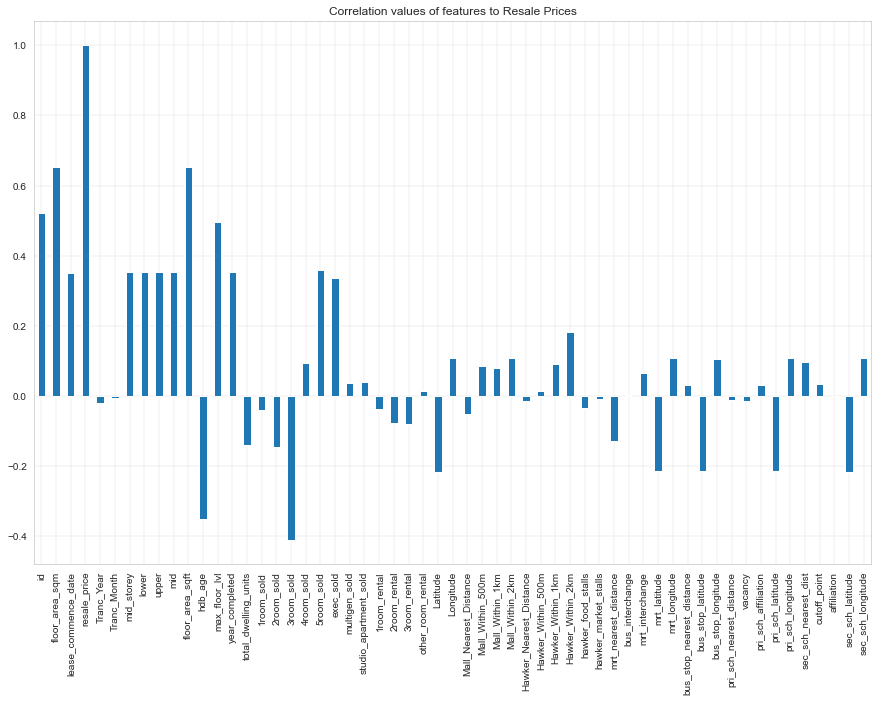

In [467]:
# Create a figure of size 15x10 inches
plt.figure(figsize=(15,10))

# Plot the correlation matrix as a bar chart
corr_matrix.plot.bar()

# Add gridlines with a linewidth of 0.3
plt.grid(visible=True, linewidth=0.3)

# Add a title to the plot
plt.title('Correlation values of features to Resale Prices');

The logical features that are more correlated to resale price are;
1. floor_area_sqm
2. lease_commence_date
3. mid_storey
4. lower
5. upper
6. mid
7. floor_area_sqft
8. hdb_age
9. max_floor-lvl
10. year_completed
11. total_dwelling_units
12. 2room_sold
13. 3room_sold
14. 4room_sold
15. 5room_sold
16. exec_sold
17. 2room_rental
18. 3room_rental
19. Mall_Within_500m
20. Mall_Within_1km
21. Mall_Within_2km
22. Hawker_Within_1km
23. Hawker_Within_2km
24. mrt_nearest_distance
25. mrt_interchange
26. sec_sch_nearest_distance

We can consider the above features that for our modelling. 

<br>Plotting a heatmap to check for multicolinearity of features. 

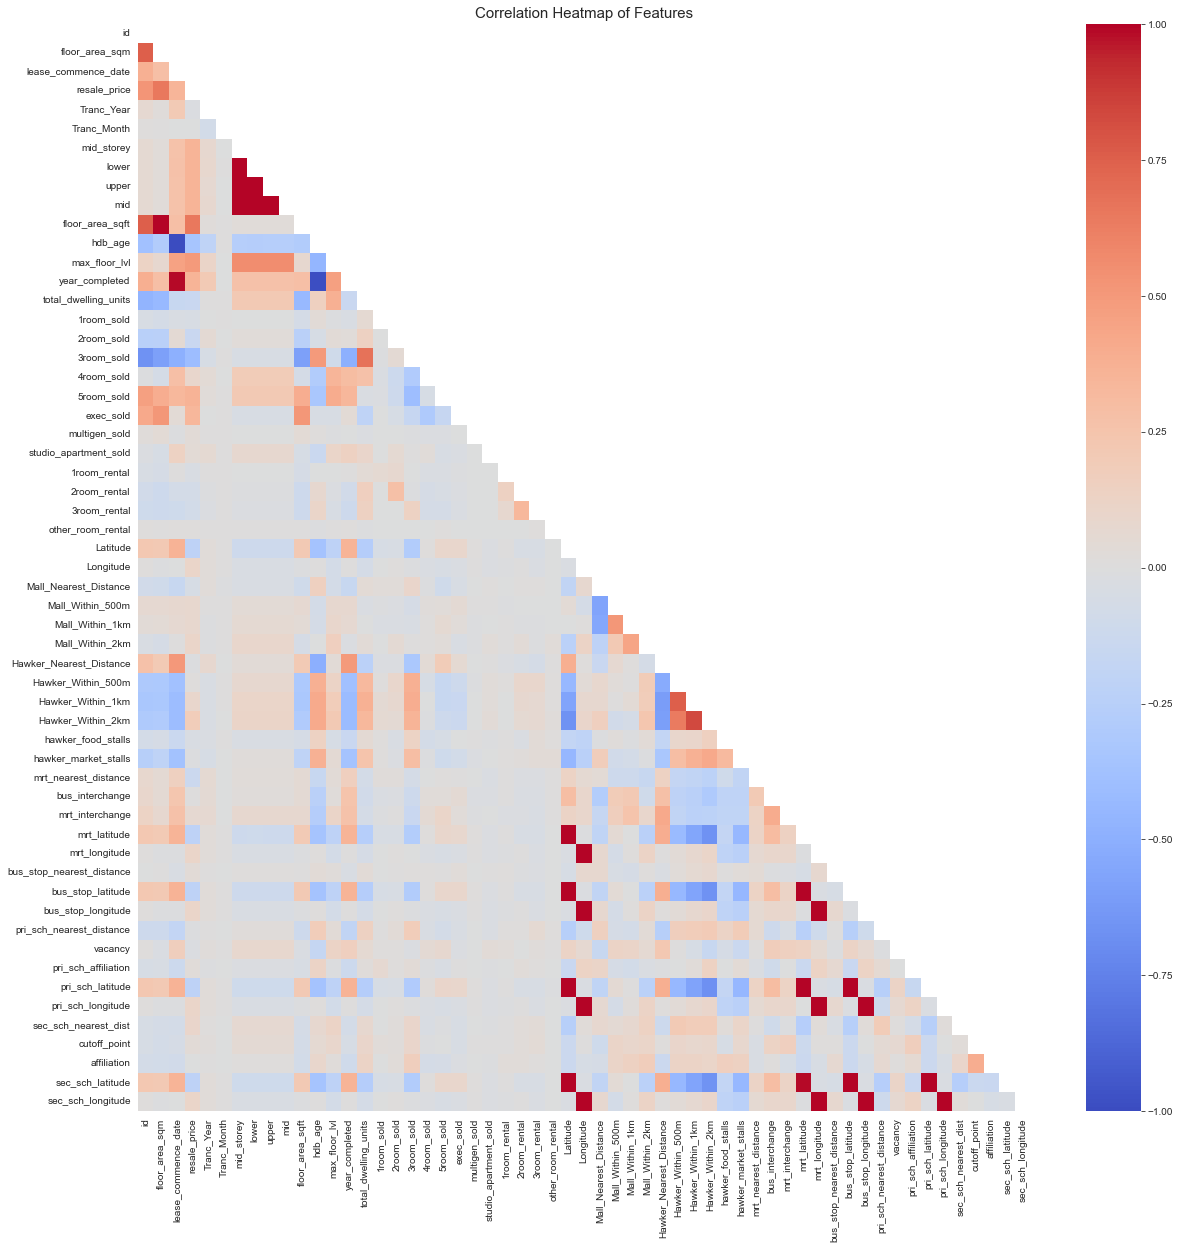

In [468]:
''' This is a plot of the correlation between the variables
    To do this, we use the seaborn library and the heatmap function
    We first set the size of the figure
    We then use the heatmap function with the train_df.corr() function
    The cmap parameter allows us to change the color scheme
    The mask parameter allows us to mask the upper triangle of the correlation matrix
    We then set the title of the plot
'''
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(), cmap='coolwarm', mask=np.triu(np.ones_like(train_df.corr(),dtype=bool)))
plt.title('Correlation Heatmap of Features', fontdict={'fontsize':15});

We detect multicolinear features between 'floor_area_sqm' & 'floor_area_sqft', and between 'longitude','latitude', 'mrt_longitude','mrt_latitude','bus_stop_longitude','bus_stop_latitude','pri_sch_longitude','pri_sch_latitude', 'sec_sch_longitude' and 'sec_sch_latitude', as well as between 'mid_storey','lower','upper', & 'mid', 'lease_commence_date', 'hdb_age' & 'year_completed'. <br>
We can clean up these features when we do our modelling later on. <br><br>

In [469]:
train_df['flat_type'].unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

<br>Getting an understanding of the resale price over the years.

In [470]:
# Calculate average resale price by flat type and transaction year
price_trend = train_df[['flat_type','resale_price','Tranc_Year']]
price_trend = price_trend.groupby(['flat_type','Tranc_Year']).mean()
price_trend

resale_price
flat_type        Tranc_Year               
1 ROOM           2012        233363.636364
                 2013        240100.000000
                 2014        222868.421053
                 2015        206285.714286
                 2016        212000.000000
...                                    ...
MULTI-GENERATION 2017        741666.666667
                 2018        783574.000000
                 2019        803314.666667
                 2020        775833.333333
                 2021        732500.000000

[70 rows x 1 columns]

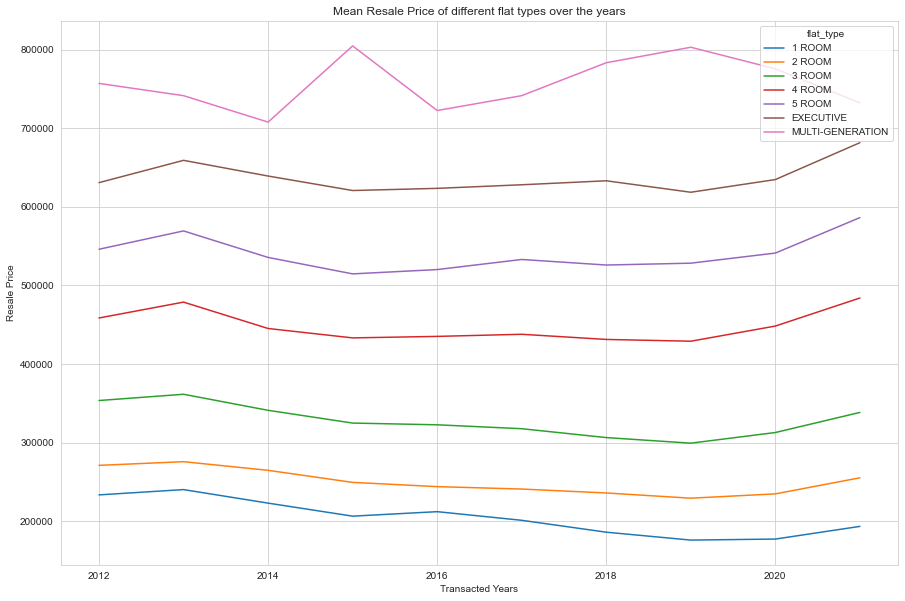

In [471]:
# Plotting a line plot to show the mean resale price of different flat types over the years
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.lineplot(data=price_trend, x='Tranc_Year',y='resale_price',hue='flat_type')
plt.title('Mean Resale Price of different flat types over the years')
plt.xlabel('Transacted Years')
plt.ylabel('Resale Price');

From the linechart above, we observe that resale prices are on a rise since 2019(with a steeper increase from 2020 during the covid years) except for multigeneration flat types which faced a decrease. 

*The resale prices most likely decreased in 2013 due to the property cooling measures introduced by the government in the early 2010s.*


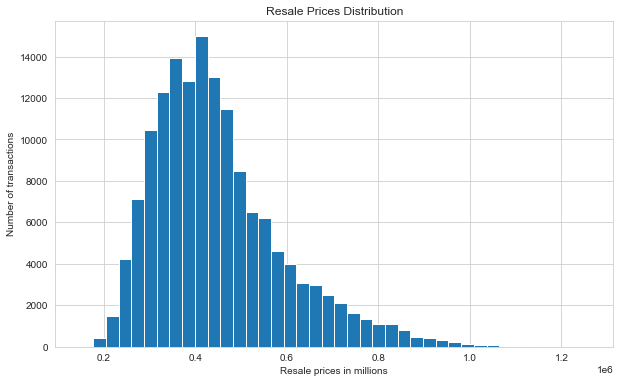

In [472]:
plt.figure(figsize=(10,6)) # Set the figure size
plt.hist(train_df['resale_price'], bins = 40) # Plot a histogram of resale prices with 40 bins
plt.title('Resale Prices Distribution') # Add a title to the plot
plt.xlabel('Resale prices in millions') # Add a label to the x-axis
plt.ylabel('Number of transactions') # Add a label to the y-axis
plt.show() # Display the plot

Our resale prices distribution is a little skewed to the left.

#### Outlier Detection and Removal using Boxplot and Percentile

Creating a boxplot to visualize resale prices of different flat types.

In [473]:
import plotly.express as px

In [474]:
# This is a visualization of resale prices over the years
px.box(train_df, x='flat_type', y='resale_price',width = 1000, height=800, labels=True,
      title='General Visualization of Resale Prices over the Years')

There seems to be quite a number of outliers in each flat type sold. We will remove the outliers that are at the top 0.5% of each flat type(except 1 ROOM which has no outliers). 

In [475]:
### Determining top 0.5% resale price for each flat type.

room_2_uppermost_quantile= train_df[train_df['flat_type']=='2 ROOM']['resale_price'].quantile(0.995)
room_3_uppermost_quantile= train_df[train_df['flat_type']=='3 ROOM']['resale_price'].quantile(0.995)
room_4_uppermost_quantile= train_df[train_df['flat_type']=='4 ROOM']['resale_price'].quantile(0.995)
room_5_uppermost_quantile= train_df[train_df['flat_type']=='5 ROOM']['resale_price'].quantile(0.995)
exec_uppermost_quantile= train_df[train_df['flat_type']=='EXECUTIVE']['resale_price'].quantile(0.995)
multigen_uppermost_quantile= train_df[train_df['flat_type']=='MULTI-GENERATION']['resale_price'].quantile(0.995)

In [476]:
# The code above calculates the 99% quantile for each room type and stores it in a variable. The quantile is the value below which 99% of the data points fall. The quantile is used to filter out outliers, which are data points that fall far outside the range of most of the data.

print('2 ROOM 99% QUANTILE: ', room_2_uppermost_quantile)
print('3 ROOM 99% QUANTILE: ', room_3_uppermost_quantile)
print('4 ROOM 99% QUANTILE: ', room_4_uppermost_quantile)
print('5 ROOM 99% QUANTILE: ', room_5_uppermost_quantile)
print('EXEC 99% QUANTILE: ', exec_uppermost_quantile)
print('MULTI-GENERATION 99% QUANTILE: ', multigen_uppermost_quantile)

2 ROOM 99% QUANTILE:  390000.0
3 ROOM 99% QUANTILE:  630000.0
4 ROOM 99% QUANTILE:  860613.5999999945
5 ROOM 99% QUANTILE:  1008888.0
EXEC 99% QUANTILE:  998119.999999999
MULTI-GENERATION 99% QUANTILE:  969000.0


In [477]:
### Creating a new train dataset without outliers for use later on

no_outliers_train_df = train_df.loc[(train_df['flat_type']=='2 ROOM') & (train_df['resale_price'] <room_2_uppermost_quantile) |
             (train_df['flat_type']=='3 ROOM') & (train_df['resale_price'] <room_3_uppermost_quantile) |
             (train_df['flat_type']=='4 ROOM') & (train_df['resale_price'] <room_4_uppermost_quantile) |
             (train_df['flat_type']=='5 ROOM') & (train_df['resale_price'] <room_5_uppermost_quantile) |
             (train_df['flat_type']=='EXECUTIVE') & (train_df['resale_price'] <exec_uppermost_quantile) | 
             (train_df['flat_type']=='MULTI-GENERATION') & (train_df['resale_price'] <multigen_uppermost_quantile) |
             (train_df['flat_type']=='1 ROOM')
            ]
no_outliers_train_df

id Tranc_YearMonth             town         flat_type block  \
0        88471         2016-05  KALLANG/WHAMPOA            4 ROOM    3B   
1       122598         2012-07           BISHAN            5 ROOM   153   
2       170897         2013-07      BUKIT BATOK         EXECUTIVE  289B   
3        86070         2012-04           BISHAN            4 ROOM   232   
4       153632         2017-12           YISHUN            4 ROOM   876   
...        ...             ...              ...               ...   ...   
150629   39814         2020-09        WOODLANDS         EXECUTIVE   849   
150630  147177         2017-06      JURONG WEST            5 ROOM  648D   
150631  179087         2020-12            BEDOK         EXECUTIVE   639   
150632   21309         2016-05       QUEENSTOWN            3 ROOM    32   
150633  185947         2018-06           YISHUN  MULTI-GENERATION   666   

               street_name storey_range  floor_area_sqm        flat_model  \
0         UPP BOON KENG RD     10 TO 12            90.0           Model A   
1             BISHAN ST 13     07 TO 09           130.0          Improved   
2           BT BATOK ST 25     13 TO 15           144.0         Apartment   
3             BISHAN ST 22     01 TO 05           103.0           Model A   
4             YISHUN ST 81     01 TO 03            83.0        Simplified   
...                    ...          ...             ...               ...   
150629     WOODLANDS ST 82     04 TO 06           161.0         Apartment   
150630   JURONG WEST ST 61     04 TO 06           110.0          Improved   
150631  BEDOK RESERVOIR RD     10 TO 12           144.0         Apartment   
150632          HOLLAND CL     07 TO 09            59.0          Improved   
150633        YISHUN AVE 4     07 TO 09           164.0  Multi Generation   

        lease_commence_date  ...  vacancy  pri_sch_affiliation  \
0                      2006  ...       78                    1   
1                      1987  ...       45                    1   
2                      1997  ...       39                    0   
3                      1992  ...       20                    1   
4                      1987  ...       74                    0   
...                     ...  ...      ...                  ...   
150629                 1995  ...       43                    0   
150630                 2001  ...       45                    0   
150631                 1993  ...       43                    1   
150632                 1974  ...       82                    0   
150633                 1987  ...       53                    0   

        pri_sch_latitude  pri_sch_longitude  sec_sch_nearest_dist  \
0               1.317659         103.882504           1138.633422   
1               1.349783         103.854529            447.894399   
2               1.345245         103.756265            180.074558   
3               1.354789         103.844934            389.515528   
4               1.416280         103.838798            312.025435   
...                  ...                ...                   ...   
150629          1.444148         103.794545            189.889876   
150630          1.339244         103.698896            614.418470   
150631          1.328471         103.901299            556.889910   
150632          1.299811         103.799965            832.386515   
150633          1.421304         103.840793            552.426214   

                                   sec_sch_name  cutoff_point affiliation  \
0                      Geylang Methodist School           224           0   
1       Kuo Chuan Presbyterian Secondary School           232           0   
2                  Yusof Ishak Secondary School           188           0   
3                          Catholic High School           253           1   
4                  Orchid Park Secondary School           208           0   
...                                         ...           ...         ...   
150629               Ever

In [478]:
no_outliers_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149871 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149871 non-null  int64  
 1   Tranc_YearMonth            149871 non-null  object 
 2   town                       149871 non-null  object 
 3   flat_type                  149871 non-null  object 
 4   block                      149871 non-null  object 
 5   street_name                149871 non-null  object 
 6   storey_range               149871 non-null  object 
 7   floor_area_sqm             149871 non-null  float64
 8   flat_model                 149871 non-null  object 
 9   lease_commence_date        149871 non-null  int64  
 10  resale_price               149871 non-null  float64
 11  Tranc_Year                 149871 non-null  int64  
 12  Tranc_Month                149871 non-null  int64  
 13  mid_storey                 14

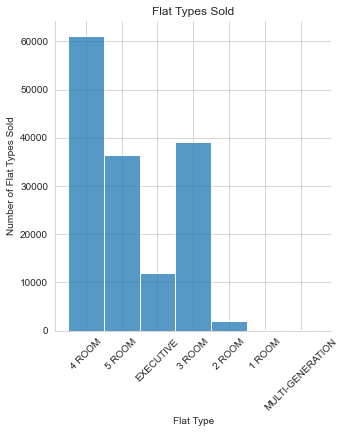

In [479]:
# Create a bar plot of the flat types sold
sns.displot(data=train_df, x= 'flat_type', height=5)
plt.title('Flat Types Sold')
plt.xlabel('Flat Type')
plt.ylabel('Number of Flat Types Sold')
plt.xticks(rotation=45);

3, 4 & 5 room flat types have the most transactions over the years. 

---

# Preprocessing and Modelling

##### Training a Baseline Model

Splitting train dataset into Features & Target Variable. 

In [480]:
### Naming features as X and target variable(resale price) as y

X = train_df.drop(columns = 'resale_price')
y = train_df[['resale_price']]

In [481]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=42)

<br>Performing scaling and one hot encoding on numeric and categorical data. 

In [482]:
### Splitting train and test data between numeric and categorial 

X_train_cat = X_train.loc[:,X_train.dtypes == 'object']
X_train_num = X_train.loc[:,X_train.dtypes != 'object']

In [483]:
X_train_cat.head()

Tranc_YearMonth             town flat_type block        street_name  \
9509           2018-04  KALLANG/WHAMPOA    3 ROOM    82         WHAMPOA DR   
72510          2015-11      JURONG EAST    3 ROOM   304  JURONG EAST ST 32   
79362          2017-11        WOODLANDS    5 ROOM   640  WOODLANDS RING RD   
120303         2013-12        WOODLANDS    4 ROOM   163    WOODLANDS ST 13   
66702          2013-05      JURONG EAST    3 ROOM    34      TEBAN GDNS RD   

       storey_range      flat_model         full_flat_type  \
9509       13 TO 15        Improved        3 ROOM Improved   
72510      10 TO 12  New Generation  3 ROOM New Generation   
79362      01 TO 03        Improved        5 ROOM Improved   
120303     01 TO 03  New Generation  4 ROOM New Generation   
66702      04 TO 06        Improved        3 ROOM Improved   

                       address residential commercial market_hawker  \
9509            82, WHAMPOA DR           Y          Y             N   
72510   304, JURONG EAST ST 32           Y          Y             N   
79362   640, WOODLANDS RING RD           Y          N             N   
120303    163, WOODLANDS ST 13           Y          N             N   
66702        34, TEBAN GDNS RD           Y          N             N   

       multistorey_carpark precinct_pavilion  postal planning_area  \
9509                     N                 N  320082        Novena   
72510                    N                 N  600304   Jurong East   
79362                    N                 N  730640     Woodlands   
120303                   N                 N  730163     Woodlands   
66702                    N                 N  600034   Jurong East   

              mrt_name   bus_stop_name              pri_sch_name  \
9509         Boon Keng          Blk 82           Hong Wen School   
72510   Chinese Garden  Opp Parc Oasis     Jurong Primary School   
79362        Admiralty         Blk 639  Greenwood Primary School   
120303       Marsiling   Marsiling Stn  Marsiling Primary School   
66702      Jurong East  Opp Blks 34/35       Qifa Primary School   

                           sec_sch_name  
9509         Bendemeer Secondary School  
72510      Bukit Batok Secondary School  
79362   Woodlands Ring Secondary School  
120303          Fuchun Secondary School  
66702     Commonwealth Secondary School

<br><br>
Dropping columns that contains repetitive or not so relevant information due to computation limitation.


In [484]:
X_train_cat.drop(columns=['Tranc_YearMonth','full_flat_type',
                          'block','street_name','flat_model','address','postal',
                          'storey_range', 'planning_area','residential', 'commercial',
                          'mrt_name','bus_stop_name',
                          'market_hawker', 'multistorey_carpark','precinct_pavilion'], inplace=True)

C:\Users\benyo\AppData\Local\Temp\ipykernel_8436\412752347.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [485]:
X_train_num.columns

Index(['id', 'floor_area_sqm', 'lease_commence_date', 'Tranc_Year',
       'Tranc_Month', 'mid_storey', 'lower', 'upper', 'mid', 'floor_area_sqft',
       'hdb_age', 'max_floor_lvl', 'year_completed', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental', 'Latitude',
       'Longitude', 'Mall_Nearest_Distance', 'Mall_Within_500m',
       'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Nearest_Distance',
       'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'bus_stop_latitude', 'bus_stop_longitude',
       'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation',
       'pri_sch_latitude', 'pri_sch_l

In [486]:
X_train_num.drop(columns = ['id','lease_commence_date','year_completed','floor_area_sqft',
                            'Tranc_Month',
                            'hawker_food_stalls','hawker_market_stalls','mrt_latitude','mrt_longitude',
                            'bus_stop_latitude', 'bus_stop_longitude',
                            'pri_sch_latitude', 'pri_sch_longitude',
                            'sec_sch_latitude', 'sec_sch_longitude'], inplace=True)

C:\Users\benyo\AppData\Local\Temp\ipykernel_8436\1179923616.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<br> Performing scaling on numeric data. 

In [487]:
### Scaling numeric data and formatting results into dataframe

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_num) 
X_train_scaled = pd.DataFrame(X_train_sc, columns = X_train_num.columns)

<br> Performing one hot encoding on categorical data. 

In [488]:
### Encoding categorical data and formatting results into dataframe

ohe = OneHotEncoder(handle_unknown = 'ignore')
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat).toarray(),
                           columns = ohe.get_feature_names_out())

<br> Merging numeric and categorical dataset back into single dataframe. 

In [489]:
X_train_merge = pd.concat([X_train_scaled,X_train_ohe], axis=1)
X_train_merge.head()

floor_area_sqm  Tranc_Year  mid_storey     lower     upper       mid  \
0       -1.282397    0.547039    1.033993  1.039210  1.027593  1.033993   
1       -1.241408   -0.542544    0.491376  0.497277  0.484908  0.491376   
2        0.931010    0.183845   -1.136476 -1.128522 -1.143147 -1.136476   
3       -0.257671   -1.268933   -1.136476 -1.128522 -1.143147 -1.136476   
4       -0.954485   -1.268933   -0.593858 -0.586589 -0.600462 -0.593858   

    hdb_age  max_floor_lvl  total_dwelling_units  1room_sold  ...  \
0  1.523504       0.137305              1.242630   -0.022425  ...   
1  0.781344      -0.343176              0.916697   -0.022425  ...   
2 -0.538053      -0.503336             -0.181183   -0.022425  ...   
3  0.616419      -1.784617             -1.862312   -0.022425  ...   
4  1.276117      -0.183015             -0.318418   -0.022425  ...   

   sec_sch_name_Xinmin Secondary School  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   sec_sch_name_Yio Chu Kang Secondary School  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   sec_sch_name_Yishun Secondary School  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   sec_sch_name_Yishun Town Secondary School  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sec_sch_name_Yuan Ching Secondary School  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   sec_sch_name_Yuhua Secondary School  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   sec_sch_name_Yusof Ishak Secondary School  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sec_sch_name_Yuying Secondary School  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   sec_sch_name_Zhenghua Secondary School  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   sec_sch_name_Zhonghua Secondary School  
0                                     0.0  
1                                     0.0  
2                                     0.0  
3                                     0.0  
4                                     0.0  

[5 rows x 385 columns]

<br><br> Performing same process for split holdout set.

In [490]:
# create X_test_cat and X_test_num
X_test_cat = X_test.loc[:,X_test.dtypes == 'object']
X_test_num = X_test.loc[:,X_test.dtypes != 'object']

# drop columns in X_test_cat
X_test_cat.drop(columns=['Tranc_YearMonth','full_flat_type',
                          'block','street_name','flat_model','address','postal',
                          'storey_range','planning_area','residential', 'commercial',
                          'mrt_name','bus_stop_name',
                          'market_hawker', 'multistorey_carpark','precinct_pavilion'], inplace=True)

# drop columns in X_test_num
X_test_num.drop(columns = ['id','lease_commence_date','year_completed','floor_area_sqft',
                            'Tranc_Month',
                            'hawker_food_stalls','hawker_market_stalls','mrt_latitude','mrt_longitude',
                            'bus_stop_latitude', 'bus_stop_longitude',
                            'pri_sch_latitude', 'pri_sch_longitude',
                            'sec_sch_latitude', 'sec_sch_longitude'], inplace=True)

# scale X_test_num
X_test_sc = ss.transform(X_test_num) 
X_test_scaled = pd.DataFrame(X_test_sc, columns = X_test_num.columns)

# one-hot encode X_test_cat
X_test_ohe = pd.DataFrame(ohe.transform(X_test_cat).toarray(),
                           columns = ohe.get_feature_names_out())

# merge the two dataframes
X_test_merge = pd.concat([X_test_scaled,X_test_ohe], axis=1)
X_test_merge.head()

C:\Users\benyo\AppData\Local\Temp\ipykernel_8436\1488762486.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\benyo\AppData\Local\Temp\ipykernel_8436\1488762486.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



floor_area_sqm  Tranc_Year  mid_storey     lower     upper       mid  \
0       -0.298660   -0.179350   -0.051241 -0.044656 -0.057777 -0.051241   
1        1.012988   -0.905738   -0.051241 -0.044656 -0.057777 -0.051241   
2        1.955736   -0.179350    0.491376  0.497277  0.484908  0.491376   
3       -1.323386    1.273428   -0.051241 -0.044656 -0.057777 -0.051241   
4        1.135956    0.183845    0.491376  0.497277  0.484908  0.491376   

    hdb_age  max_floor_lvl  total_dwelling_units  1room_sold  ...  \
0 -0.620515      -0.022855             -0.215492   -0.022425  ...   
1 -0.538053       0.137305             -1.124674   -0.022425  ...   
2 -0.043279      -0.343176             -1.313372   -0.022425  ...   
3  1.358580       0.137305              0.899543   -0.022425  ...   
4 -0.043279      -0.343176             -0.901667   -0.022425  ...   

   sec_sch_name_Xinmin Secondary School  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   sec_sch_name_Yio Chu Kang Secondary School  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   sec_sch_name_Yishun Secondary School  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   sec_sch_name_Yishun Town Secondary School  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sec_sch_name_Yuan Ching Secondary School  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   sec_sch_name_Yuhua Secondary School  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   sec_sch_name_Yusof Ishak Secondary School  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sec_sch_name_Yuying Secondary School  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   sec_sch_name_Zhenghua Secondary School  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   sec_sch_name_Zhonghua Secondary School  
0                                     0.0  
1                                     0.0  
2                                     0.0  
3                                     0.0  
4                                     0.0  

[5 rows x 385 columns]

In [491]:
### Checking to see if columns tally between train and holdout set.

X_train_merge.columns.difference(X_test_merge.columns)

Index([], dtype='object')

First dataset is ready to be use for training a baseline model.

### Creating a Baseline Model

In [492]:
### Instantiate and train model

b_model = LinearRegression()
b_model.fit(X_train_merge, y_train)

LinearRegression()

#### Baseline Model Evaluation

In [493]:
### Measuring baseline model's accuracy with train set

y_hat_train = b_model.predict(X_train_merge)

In [494]:
r2_score(y_train, y_hat_train)

0.8971141352101473

The baseline model's r2-score is 89.71%. 

In [495]:
### Cross-validation Model

print(f'Cross Validation Score of Baseline Model is: {cross_val_score(b_model, X_train_merge, y_train, cv=5).mean()}')

Cross Validation Score of Baseline Model is: 0.8962810425974744


<br> Measuring baseline model accuracy with holdout set.

In [496]:
y_hat_test = b_model.predict(X_test_merge)

In [497]:
r2_score(y_test, y_hat_test)

0.8953033655054305

In [498]:
mean_squared_error(y_test, y_hat_test)

2124829846.8507817

In [499]:
cross_val_score(b_model, X_test_merge, y_test, cv=5).mean() 

-3481732523651413.0

Cross validation score of baseline model is 0.8962810425974744 in train set vs -4.842305809784296e+16 in test set.<br>
Whereas R2 score was 0.8971141352101473 vs --1.919590302721265e+20<br>
**Model is overfitted**

Time to retrain and improve model. We will conduct some feature engineering before creating a new model and passing both the baseline and new model through regularization. 

---

### Feature Engineering

Creating a new feature 'Postal Sector' derived from original postal code column in train_df. In Singapore, the postal sector is represented by the first 2 digits of the postal code.   

In [500]:
### Creating a new column 'postal_sector' using first 2 digits of 'postal' column. 

no_outliers_train_df['postal_sector'] = no_outliers_train_df['postal'].str[:2]
no_outliers_train_df['postal_sector']

C:\Users\benyo\AppData\Local\Temp\ipykernel_8436\24939325.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         38
1         57
2         65
3         57
4         76
          ..
150629    73
150630    64
150631    41
150632    27
150633    76
Name: postal_sector, Length: 149871, dtype: object

In [501]:
no_outliers_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149871 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149871 non-null  int64  
 1   Tranc_YearMonth            149871 non-null  object 
 2   town                       149871 non-null  object 
 3   flat_type                  149871 non-null  object 
 4   block                      149871 non-null  object 
 5   street_name                149871 non-null  object 
 6   storey_range               149871 non-null  object 
 7   floor_area_sqm             149871 non-null  float64
 8   flat_model                 149871 non-null  object 
 9   lease_commence_date        149871 non-null  int64  
 10  resale_price               149871 non-null  float64
 11  Tranc_Year                 149871 non-null  int64  
 12  Tranc_Month                149871 non-null  int64  
 13  mid_storey                 14

##### Extracting features to reduce noise to create a better model than baseline

In [502]:
X_new = no_outliers_train_df[['floor_area_sqm','Tranc_Year', 'mid_storey','max_floor_lvl',
                  'hdb_age', 'total_dwelling_units','year_completed',
                  'town', 'flat_type', 'pri_sch_name', 'sec_sch_name',
                  'commercial','multistorey_carpark','market_hawker',
                  'Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km','Mall_Within_2km',
                  'Hawker_Within_1km','Hawker_Within_2km', 'mrt_nearest_distance',
                  'mrt_interchange','sec_sch_nearest_dist',
                  '2room_sold','3room_sold','4room_sold','5room_sold',
                  'exec_sold','2room_rental','3room_rental','flat_model', 'postal_sector'          
                  ]]
X_new.head()

floor_area_sqm  Tranc_Year  mid_storey  max_floor_lvl  hdb_age  \
0            90.0        2016          11             25       15   
1           130.0        2012           8              9       34   
2           144.0        2013          14             16       24   
3           103.0        2012           3             11       29   
4            83.0        2017           2              4       34   

   total_dwelling_units  year_completed             town  flat_type  \
0                   142            2005  KALLANG/WHAMPOA     4 ROOM   
1                   112            1987           BISHAN     5 ROOM   
2                    90            1996      BUKIT BATOK  EXECUTIVE   
3                    75            1990           BISHAN     4 ROOM   
4                    48            1987           YISHUN     4 ROOM   

                            pri_sch_name  ... sec_sch_nearest_dist 2room_sold  \
0               Geylang Methodist School  ...          1138.633422          0   
1  Kuo Chuan Presbyterian Primary School  ...           447.894399          0   
2                  Keming Primary School  ...           180.074558          0   
3                   Catholic High School  ...           389.515528          0   
4              Naval Base Primary School  ...           312.025435          0   

  3room_sold 4room_sold  5room_sold  exec_sold  2room_rental  3room_rental  \
0          0         96          46          0             0             0   
1          0         56          56          0             0             0   
2          0          0          30         60             0             0   
3          0         68           7          0             0             0   
4          0         30          18          0             0             0   

   flat_model  postal_sector  
0     Model A             38  
1    Improved             57  
2   Apartment             65  
3     Model A             57  
4  Simplified             76  

[5 rows x 32 columns]

In [503]:
### Creating a new target variable without outliers. 

y_new = no_outliers_train_df['resale_price']

<br><br>Checking for Multicolinearity of Features in X_new. 

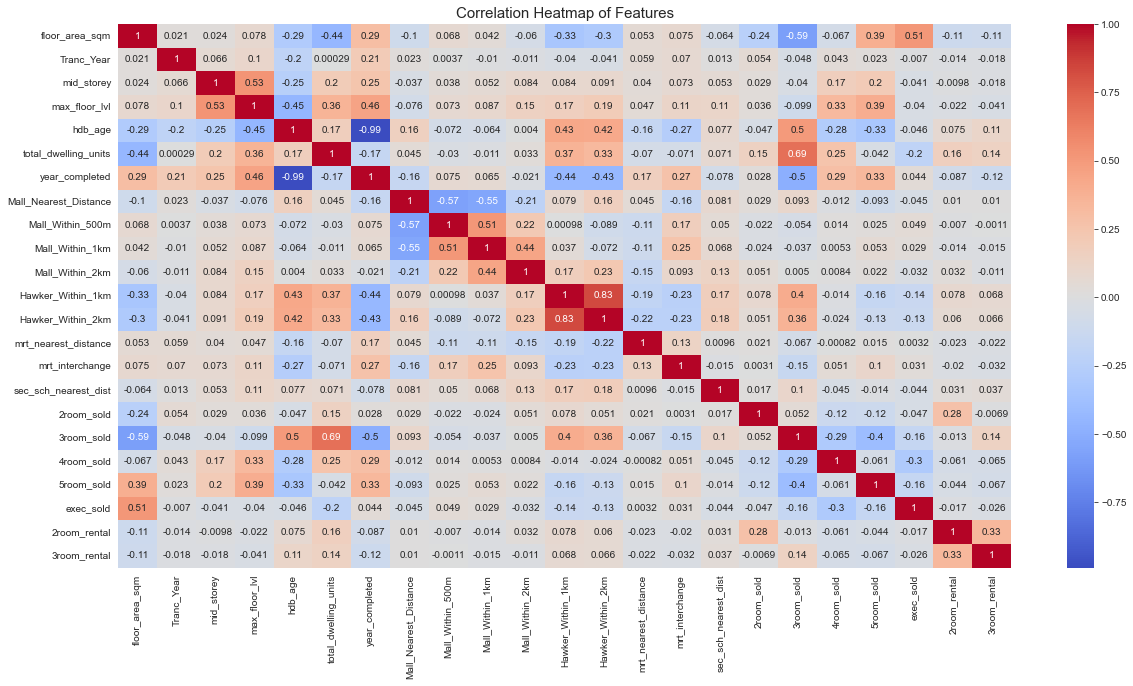

In [504]:
plt.figure(figsize=(20,10)) # Setting the figure size
sns.heatmap(X_new.corr(), annot = True,cmap = 'coolwarm') # Creating the heatmap
plt.title('Correlation Heatmap of Features', fontdict = {'fontsize':15}); # Adding a title

There is a -0.99 value between hdb_age and year_completed feature. We will remove the year_completed feature. 
<br><br>

In [505]:
X_new.drop(columns = 'year_completed', inplace=True)

C:\Users\benyo\AppData\Local\Temp\ipykernel_8436\3071201847.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Training a new model

Performing train test split, scaling and onehot encoding on new data. 

In [506]:
### Train test split data

X1_train, X1_test, y1_train, y1_test = train_test_split(X_new,y_new, test_size =0.3, random_state=216)

In [507]:
### Splitting data into numerical and categorical data

X1_train_cat = X1_train.loc[:,X1_train.dtypes == 'object']
X1_train_num = X1_train.loc[:,X1_train.dtypes != 'object']

X1_test_cat = X1_test.loc[:,X1_test.dtypes == 'object']
X1_test_num = X1_test.loc[:,X1_test.dtypes != 'object']

In [508]:
### Transforming train data

ss = StandardScaler()
X1_train_sc = ss.fit_transform(X1_train_num) 

X1_train_scaled = pd.DataFrame(X1_train_sc, columns = X1_train_num.columns)

ohe = OneHotEncoder(handle_unknown = 'ignore')
X1_train_ohe = pd.DataFrame(ohe.fit_transform(X1_train_cat).toarray(),
                           columns = ohe.get_feature_names_out())

X1_train_merge = pd.concat([X1_train_scaled,X1_train_ohe], axis=1)
X1_train_merge.head()


floor_area_sqm  Tranc_Year  mid_storey  max_floor_lvl   hdb_age  \
0        0.934486    0.551972    1.095000      -0.173712 -0.381865   
1        2.000575    0.188135   -1.167098      -0.678460  0.362513   
2       -0.623645   -0.175702   -1.167098      -1.856206  0.941473   
3       -0.541638   -0.539539   -0.601573      -0.341961  0.527930   
4        1.016492    1.279645   -0.036049       0.162787 -0.547282   

   total_dwelling_units  Mall_Nearest_Distance  Mall_Within_500m  \
0              0.166659               0.359638         -0.668835   
1             -1.112688               0.912372         -0.668835   
2             -1.890670               0.988227         -0.668835   
3             -0.490303              -0.505870          0.703728   
4             -0.023514              -1.183299          0.703728   

   Mall_Within_1km  Mall_Within_2km  ...  postal_sector_75  postal_sector_76  \
0         0.150534        -0.043172  ...               0.0               0.0   
1        -1.252731        -0.911700  ...               0.0               1.0   
2        -1.252731        -0.911700  ...               0.0               0.0   
3        -0.551099        -0.911700  ...               0.0               0.0   
4         0.852166         0.246338  ...               0.0               0.0   

   postal_sector_79  postal_sector_80  postal_sector_81  postal_sector_82  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   postal_sector_85  postal_sector_90  postal_sector_91  postal_sector_NI  
0               0.0               0.0               0.0               0.0  
1               0.0               0.0               0.0               0.0  
2               0.0               0.0               0.0               0.0  
3               0.0               0.0               0.0               0.0  
4               0.0               0.0               0.0               0.0  

[5 rows x 448 columns]

In [509]:
# Transforming holdout data

# Scale numeric variables
X1_test_sc = ss.transform(X1_test_num) 

# Create a DataFrame of the scaled numeric variables
X1_test_scaled = pd.DataFrame(X1_test_sc, columns = X1_test_num.columns)

# One-hot encode categorical variables
X1_test_ohe = ohe.transform(X1_test_cat)

# Create a DataFrame of the one-hot encoded categorical variables
X1_test_ohe_df = pd.DataFrame(X1_test_ohe.toarray(),
                           columns = ohe.get_feature_names_out())

# Combine the scaled numeric and one-hot encoded categorical variables
X1_test_merge = pd.concat([X1_test_scaled, X1_test_ohe_df], axis=1)

# View the first five rows of the merged DataFrame
X1_test_merge.head()

floor_area_sqm  Tranc_Year  mid_storey  max_floor_lvl   hdb_age  \
0       -1.238697   -0.539539    0.529476      -0.341961  1.106890   
1        1.221510    0.551972    0.529476      -0.510211  0.362513   
2        1.180506   -0.175702    1.095000      -0.173712  0.031678   
3        1.754554    1.279645    0.529476      -0.005462  0.610638   
4        0.278431    1.279645   -1.167098      -0.678460  0.858764   

   total_dwelling_units  Mall_Nearest_Distance  Mall_Within_500m  \
0              3.589779               0.629204         -0.668835   
1             -0.058091              -0.356316         -0.668835   
2             -0.836073              -0.529762          0.703728   
3             -0.455726              -1.004861          0.703728   
4             -0.092668              -0.111585         -0.668835   

   Mall_Within_1km  Mall_Within_2km  ...  postal_sector_75  postal_sector_76  \
0         0.150534        -0.043172  ...               0.0               0.0   
1        -0.551099        -0.911700  ...               0.0               1.0   
2        -0.551099         0.535848  ...               0.0               0.0   
3        -0.551099        -0.911700  ...               0.0               0.0   
4         2.957063         0.535848  ...               0.0               0.0   

   postal_sector_79  postal_sector_80  postal_sector_81  postal_sector_82  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   postal_sector_85  postal_sector_90  postal_sector_91  postal_sector_NI  
0               0.0               0.0               0.0               0.0  
1               0.0               0.0               0.0               0.0  
2               0.0               0.0               0.0               0.0  
3               0.0               0.0               0.0               0.0  
4               0.0               0.0               0.0               0.0  

[5 rows x 448 columns]

<br> Train and evaluate new model

In [510]:
### Instantiate and train new model
new_model = LinearRegression()
new_model.fit(X1_train_merge,y1_train)

### Predict and score model
new_pred = new_model.predict(X1_test_merge)
r2_score(y1_test, new_pred)

0.9082519342615317

In [511]:
cross_val_score(new_model, X1_test_merge, y1_test, cv=5).mean()

-80475110363570.97

In [512]:
mse1 = mean_squared_error(y1_test, new_pred)
np.sqrt(mse1)

42235.95125302551

New model performs better than baseline but is still overfitted. We will perform regularization. 

---

### Regularization for a better model

Trying out RidgeCV, LassoCV and ElasticNetCV on first dataset used for baseline model.

In [513]:
r_alphas = np.logspace(0,5,100)

In [514]:
# Create a ridge regression object
ridge_cv = RidgeCV(alphas = r_alphas, scoring = 'r2', cv=5).fit(X_train_merge, y_train)

In [515]:
print(ridge_cv.score(X_train_merge, y_train))
print(ridge_cv.score(X_test_merge, y_test))

0.8970576362669226
0.8952923722809134


The RidgeCV accuracy for the baseline model's train and holdout set are 89.71% vs 89.52% respectively. <br><br>   

In [516]:
lasso_cv = LassoCV(n_alphas=100, cv=5, max_iter=1000).fit(X_train_merge, y_train)

c:\Users\benyo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [517]:
print(lasso_cv.score(X_train_merge, y_train))
print(lasso_cv.score(X_test_merge, y_test))

0.8850540392660402
0.8837554403177275


The LassoCV accuracy for the baseline model's train and holdout set are 88.51% vs 88.36% respectively. <br><br>

In [518]:
enet_cv = ElasticNetCV(n_alphas=100, cv=5).fit(X_train_merge,y_train)

c:\Users\benyo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [519]:
print(enet_cv.score(X_train_merge, y_train))
print(enet_cv.score(X_test_merge, y_test))

0.041021762285551655
0.04076799366701511


The ElasticNetCV accuracy for the baseline model's train and holdout set are bad. <br><br>

Measuring the RMSE of model since it is an evaluation metric of the Kaggle submission.

In [520]:
# y_pred is the predicted value of the model
# y_test is the actual value
y_pred = ridge_cv.predict(X_test_merge)
# mean_squared_error is a function that calculates the mean squared error
mse = mean_squared_error(y_test, y_pred)
# rmse is the root mean squared error, calculated by taking the square root of the mean squared error
rmse = np.sqrt(mse)
# print the root mean squared error of the model
print(f'RMSE of model prediction is {rmse}')

RMSE of model prediction is 46098.29666664044


A Ridge Regression model performs slightly better as compared to a Lasso or a simple Linear Regression, and way better than ElasticNet, with an accuracy score of 89.52% and RMSE of 46126.23167497795 for the holdout set.<br><br> 

Trying out RidgeCV, LassoCV and ElasticNetCV on 2nd dataset with outliers removed and features engineered.

In [521]:

# RidgeCV performs ridge regression with built-in cross-validation of the alpha parameter.
# It uses five-fold cross validation to select the best alpha from a list of alphas.
ridge_cv1 = RidgeCV(alphas = r_alphas, scoring = 'r2', cv=5).fit(X1_train_merge, y1_train)

# Print the best alpha value found.
print(ridge_cv1.score(X1_train_merge, y1_train))


0.9095618914513153


In [522]:
print(ridge_cv1.score(X1_test_merge, y1_test))

0.9082512934044783


In [523]:
# Predictions on the test set
y_pred1 = ridge_cv1.predict(X1_test_merge)

# Calculate MSE and RMSE
mse_new = mean_squared_error(y1_test, y_pred1)
rmse_new = np.sqrt(mse_new)
rmse_new

42236.0987610944

In [524]:
# Fit model to training data
lasso_cv1 = LassoCV(
    n_alphas=100, # Number of alphas to try
    cv=5, # Number of cross-validation folds
    max_iter=1000 # Maximum number of iterations
).fit(X1_train_merge, y1_train)

# Print score of model on training data
print(lasso_cv1.score(X1_train_merge, y1_train))

0.8932685556427342


In [525]:
# create ElasticNetCV model
enet_cv1 = ElasticNetCV(n_alphas=100, cv=5).fit(X1_train_merge,y1_train)

# print scores
print(enet_cv1.score(X1_train_merge, y1_train))
print(enet_cv1.score(X1_test_merge, y1_test))

0.03266453722387885
0.03276687166682457


The Ridge Regression model performs better as compared to a Lasso or a simple Linear Regression, and way better than ElasticNet, with an accuracy score of 90.83% and RMSE of 42235.442377972795 for the holdout set.<br><br> 

---

## Conclusion

##### Feature Importance

Looking at some features that are commonly perceived as important in real estate. 

In [526]:
### Extracting model's coefficient values of each feature and setting them into a separate dataframe

importances = pd.DataFrame(data={
    'Feature': X1_train_merge.columns,
    'Importance': ridge_cv1.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [527]:
importances.head(15)

Feature     Importance
389                        flat_model_Terrace  238450.555573
145       pri_sch_name_Nan Hua Primary School  131268.977549
163      pri_sch_name_Pei Tong Primary School  129219.388635
86       pri_sch_name_Clementi Primary School  110689.877453
172          pri_sch_name_Qifa Primary School  101572.558669
38                             town_PASIR RIS   99725.190712
324  sec_sch_name_Queenstown Secondary School   82801.801617
115           pri_sch_name_Haig Girls' School   80695.331180
37                         town_MARINE PARADE   79831.088434
417                          postal_sector_44   79831.088434
377            flat_model_Improved-Maisonette   79043.092649
28                           town_BUKIT TIMAH   77506.312198
0                              floor_area_sqm   76721.643178
97          pri_sch_name_Eunos Primary School   73343.807232
251          sec_sch_name_CHIJ Katong Convent   68819.445413

In [528]:
### Selecting some features that are usually deemed important by the general public

feature_importance_1 = importances[(importances['Feature'].str.contains('hdb_age'))|
            (importances['Feature'].str.contains('floor_area_sqm'))|
            (importances['Feature'].str.contains('Mall_Nearest_Distance'))|
            (importances['Feature'].str.contains('mrt_nearest_distance'))|
            (importances['Feature'].str.contains('total_dwelling_units'))|
            (importances['Feature'].str.contains('max_floor_lvl'))|
            (importances['Feature'].str.contains('mid_storey'))]  
feature_importance_1

Feature    Importance
0          floor_area_sqm  76721.643178
2              mid_storey  17659.010410
3           max_floor_lvl  11909.423571
6   Mall_Nearest_Distance   4897.304590
5    total_dwelling_units   -986.612387
12   mrt_nearest_distance -26184.209701
4                 hdb_age -53540.761891

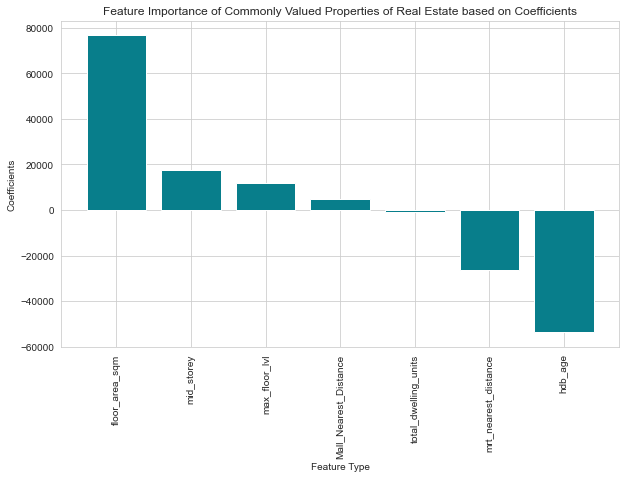

In [529]:
# Create a figure size
plt.figure(figsize=(10,6))

# Create a bar plot with the feature importance
plt.bar(x=feature_importance_1['Feature'], height = feature_importance_1['Importance'], color = '#087E8B')

# Add a title and axis labels
plt.title('Feature Importance of Commonly Valued Properties of Real Estate based on Coefficients')
plt.xticks(rotation=90)
plt.xlabel('Feature Type')
plt.ylabel('Coefficients')

# Show the plot
plt.show()

Interestingly, we observe from the chart that being close to transportation(mrt) is more important than being close to a mall (-26184 vs 4897), and while the age of hdb does inversely affects the resale prices, but the floor area have a more significant impact(-53540 vs 76721).

#### Our Chosen Model

The ridge regression model of the feature engineered dataset '(ridge_cv1) performs better than the first dataset(ridge_cv) with accuracy scores of 90.83% vs 89.52%, and RMSE of 42235.186436377015 vs 46126.23167497795 respectively. <br> We will use the model 'ridge_cv1' on our test dataset to predict the resale prices. 

---

# Prediction using Chosen Model

### Preparing test dataset for model prediction.

Creating 'Postal Sector' column in test_df

In [530]:
# Add a new column 'postal_sector' that contains the first two characters of the postal code
test_df['postal_sector'] = test_df['postal'].str[:2]
test_df['postal_sector']

0        76
1        64
2        56
3        73
4        65
         ..
16732    56
16733    82
16734    68
16735    57
16736    61
Name: postal_sector, Length: 16737, dtype: object

<br>Extracting and transforming features for model preparation. 

In [531]:
#This code is to get the data ready for prediction. It will scale the numerical data and one hot encode the categorical data.

test_df_new = test_df[['floor_area_sqm', 'Tranc_Year', 'mid_storey', 'max_floor_lvl',
       'hdb_age', 'total_dwelling_units', 'town',
       'flat_type', 'pri_sch_name', 'sec_sch_name', 'commercial',
       'multistorey_carpark', 'market_hawker', 'Mall_Nearest_Distance',
       'Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km',
       'Hawker_Within_1km', 'Hawker_Within_2km', 'mrt_nearest_distance',
       'mrt_interchange', 'sec_sch_nearest_dist', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', '2room_rental', '3room_rental',
       'flat_model','postal_sector']]

# Separate numerical and categorical data
test_df_cat = test_df_new.loc[:,test_df_new.dtypes == 'object']
test_df_num = test_df_new.loc[:,test_df_new.dtypes != 'object']

# Scale numerical data
test_df_sc = ss.transform(test_df_num) 
test_df_scaled = pd.DataFrame(test_df_sc, columns = test_df_num.columns)

# One hot encode categorical data
test_df_ohe = pd.DataFrame(ohe.transform(test_df_cat).toarray(),
                           columns = ohe.get_feature_names_out())
test_df_merge = pd.concat([test_df_scaled,test_df_ohe], axis=1)
test_df_merge.head()

floor_area_sqm  Tranc_Year  mid_storey  max_floor_lvl   hdb_age  \
0       -0.541638   -1.631049   -0.036049      -0.510211  0.445221   
1        0.606458    0.915808   -0.601573      -0.173712 -1.291660   
2       -1.197693   -1.267212   -0.036049      -0.510211  1.024182   
3       -0.008593    0.188135   -1.167098      -0.173712  1.106890   
4        0.237427   -0.175702    1.660525       1.677032  0.610638   

   total_dwelling_units  Mall_Nearest_Distance  Mall_Within_500m  \
0              0.132082               0.468376         -0.668835   
1             -1.233708              -0.344726         -0.668835   
2              1.618892               0.325403         -0.668835   
3             -0.351995               1.404396         -0.668835   
4              0.339544               0.926629         -0.668835   

   Mall_Within_1km  Mall_Within_2km  ...  postal_sector_75  postal_sector_76  \
0         0.150534        -0.332681  ...               0.0               1.0   
1        -0.551099        -0.622191  ...               0.0               0.0   
2         0.150534        -0.622191  ...               0.0               0.0   
3        -1.252731        -0.622191  ...               0.0               0.0   
4        -1.252731        -0.043172  ...               0.0               0.0   

   postal_sector_79  postal_sector_80  postal_sector_81  postal_sector_82  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   postal_sector_85  postal_sector_90  postal_sector_91  postal_sector_NI  
0               0.0               0.0               0.0               0.0  
1               0.0               0.0               0.0               0.0  
2               0.0               0.0               0.0               0.0  
3               0.0               0.0               0.0               0.0  
4               0.0               0.0               0.0               0.0  

[5 rows x 448 columns]

In [532]:
### Checking to see if columns tally with model's train set features. 

test_df_merge.columns.difference(X1_train_merge.columns)

Index([], dtype='object')

Test dataset is now ready to be passed to model to predict sale prices. <br>

---

### Actual Prediction

<br>
Predicting prices using chosen model.

In [533]:
### Passing test data to chosen model for prediction

y_pred_test = ridge_cv1.predict(test_df_merge)
y_pred_test

array([378746.38089002, 497928.57946411, 354908.87535674, ...,
       384433.29491316, 503486.79115512, 382934.9022546 ])

<br>Formatting prediction into Kaggle's format requirements. 

In [534]:
sub_reg7 = test_df['id'] #get id column from test_df and create a new dataframe
sub_reg7 = pd.DataFrame(sub_reg7) #convert id column to a dataframe
sub_reg7['Predicted']= y_pred_test #add Predicted column to sub_reg7
sub_reg7.rename(columns = {'id':'Id'}, inplace=True) #rename id column to Id
sub_reg7.head()

Id      Predicted
0  114982  378746.380890
1   95653  497928.579464
2   40303  354908.875357
3  109506  326363.136748
4  100149  455001.870317

Saving prediction into csv for submission on Kaggle.

In [535]:
# Write the output to a csv file
sub_reg7.to_csv('datasets/sub_reg7.csv', index=False)

---